**Assignment:**
 Utilize a compatible environment on your system to implement
 and apply Deep Q Learning. In your assignment, elucidate the
 chosen environment, specify the task's objective, and present the
 implementation both without and with reinforcement learning.
 Include recorded images of the output.

**Environment:**
 This environment replicates the cart-pole problem version
 described by Barto, Sutton, and Anderson in "Neuronlike Adaptive
 Elements That Can Solve Difficult Learning Control Problem." It
 involves a pole attached by an un-actuated joint to a cart on a
 frictionless track. The goal is to balance the pole by applying left or
 right forces to the cart.

**Action Space:**
 Actions are represented by an array with values {O, 1}, indicating
 the direction to push the cart (left or right).  

 **Observation Space:**
 Observations are represented by an array with four elements: cart
 position, cart velocity, pole angle, and pole angular velocity. Each
 element has specific minimum and maximum values.
 - Cart Position: Initially between -4.8 and 4.8.
 - Cart Velocity: Unrestricted.
 - Pole Angle: Initially between -240 and 240.
 - Pole Angular Velocity: Unrestricted.



 **Rewards:**  
 +1 for each step, including termination steps. The goal is to
 accumulate as many rewards as possible, with a reward threshold
 of 500 for version 1 and 200 for version O.

**Starting State:**  
 All initial observations start with random values in the range (-0.05,
 0.05).
 Episode End:
 An episode ends if:
 1. Pole angle exceeds ± 120.
 2. Cart position goes beyond ±2.4.
 3. Episode length exceeds 500 steps (or 200 for version O).
 The task is to keep the pole upright for as long as possible to
 maximize rewards.

 **Action Space:**  
 Discrete(2)


**Solving Cart pole Problem without RL**

In [ ]:
import gym
import time

# Create the CartPole-v1 environment with rendering enabled
env = gym.make("CartPole-v1", render_mode="human")

# Display the action space and observation space of the environment
print("Action Space:", env.action_space)
print("Observation Space:", env.observation_space)

# Sleep for 10 seconds to allow the user to observe the environment setup
time.sleep(10)

# Run a single episode
episodes = 10
for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0

    # Main loop for the episode
    while not done:
        env.render()  # Render the environment
        action = env.action_space.sample()  # Choose a random action
        result = env.step(action)  # Take a step in the environment
        score += result[1]  # Accumulate the reward
        print("Score:", score)

    # Display episode information
    print(f"Episode: {episode}, Score: {score}")

# Close the environment after rendering
env.close()

**Without RL:**  
 Utilizing the OpenAl Gym library, I created and interacted with the
 CartPole-v1 environment. The environment was initialized with
 rendering enabled, and a single episode was run. Within the
 episode loop, the environment was continuously rendered, actions
 (either O or 1) were randomly selected using the environment's
 action space, and steps were taken in the environment. The
 episode continued until termination conditions were met. The
 agent received a score based on the cumulative rewards obtained
 during the episode.

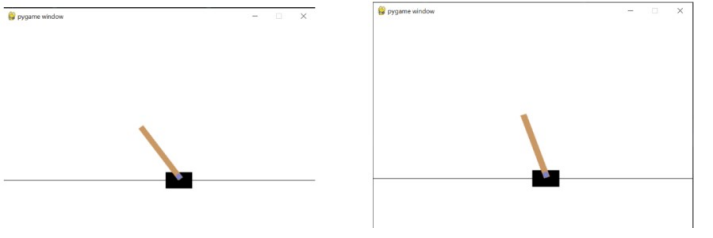

**Solving Cart Pole Problem With RL**

In [ ]:
import gym
from stable_baselines3 import DQN

# Create the CartPole-v1 environment with rendering in RGB array mode
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Initialize DQN model with MlpPolicy
model = DQN("MlpPolicy", env, verbose=1)

# Train the model for a total of 10,000 timesteps
model.learn(total_timesteps=10_000)

# Get the vectorized environment from the trained model
vec_env = model.get_env()

# Reset the environment
obs = vec_env.reset()

# Run the trained model for 1000 steps
for i in range(1000):
    # Predict the action using the trained model
    action, _state = model.predict(obs, deterministic=True)

    # Take a step in the environment
    obs, reward, done, info = vec_env.step(action)

    # Render the environment for human observation
    vec_env.render("human")

    # VecEnv resets automatically when the episode is done
    if done:
        obs = vec_env.reset()


**With RL(DQN):**  
 I employed DQN (MlpPolicy), a Policy object implementing DQN
 policy with a Multi-Layer Perceptron (MLP) architecture (2 layers of
 64). The Deep Q-Network (DQN) with MLP Policy for the cart-pole
 environment utilized a neural network to guide the agent's
 decision-making. The MLP took observations as input and
 outputted Q-values to determine the optimal action. Q-learning
 and Experience Replay were employed for learning over time by
 updating Q-values based on temporal differences. A target
 network was used to stabilize training by periodically updating the
 main Q-network. The algorithm balanced exploration and
 exploitation through an epsilon-greedy strategy, and the agent
 received a reward of +1 for each time step. The goal was to keep the pole upright for as long as possible, and episodes ended based
 on specific termination conditions. Overall, DQN with MLP Policy
 aimed to maximize cumulative rewards in the cart-pole
 environment through effective decision-making.


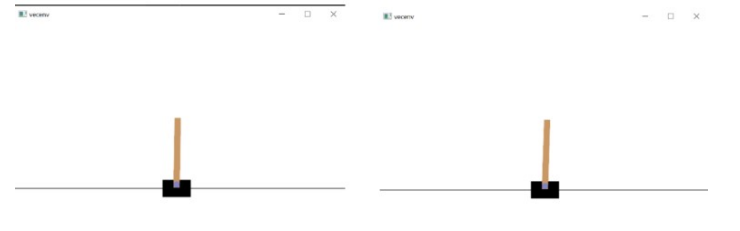